In [7]:
import ai.data_set as ds
from ai.helpers import count_num_masked_tiles, count_num_empty_tiles_not_masked
from ai.neural_network import format_data_set, get_inputs_real_outputs
from ai.evaluation import errors, histogram_percentage

%matplotlib notebook
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import random

ModuleNotFoundError: No module named 'ai'

In [7]:
seed = 42

radius_subgrids = 2
num_tiles_subgrids = ((radius_subgrids * 2) + 1) ** 2
num_rows_grid = 10
num_columns_grid = 10
num_bombs_grid = 10
num_no_bm_subgrids = int(ds.SIZE / 200)
num_bm_subgrids = int(ds.SIZE / 200)
num_subgrids = num_no_bm_subgrids + num_bm_subgrids
# 'bm' for means that the tile in the middle of the subgrids contains a bomb.
num_masked_subgrids = 20

ds_no_bm_file_name = ds.data_set_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, radius_subgrids, False)
ds_bm_file_name = ds.data_set_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, radius_subgrids, True)
# 'bm' for means that the tile in the middle of the subgrids contains a bomb.
model_file_name = "model.h5"

random.seed(seed)

# Load the data set.
data_set_gen = ds.read_data_set(ds_no_bm_file_name)
for i in range(int(ds.SIZE / 2)): next(data_set_gen) # Skip the half of the data set.
data_set = [next(data_set_gen) for i in range(num_no_bm_subgrids)]

data_set_gen = ds.read_data_set(ds_bm_file_name)
for i in range(int(ds.SIZE / 2)): next(data_set_gen) # Skip the half of the data set.
data_set.extend([next(data_set_gen) for i in range(num_bm_subgrids)])
print("Data set loaded.")

# Format the data set.
data_set = format_data_set(data_set, num_masked_subgrids)
print("Data set formatted.")

# Get the 'x' and 'y_true' vectors.
x, y_true = get_inputs_real_outputs(data_set)
print("Inputs and real outputs extracted.")

# Load the model.
model = load_model(model_file_name)

# Prediction and errors.
y_pred = model.predict(x)
y_pred = [y_p[0] for y_p in y_pred]

error_func = lambda y_t, y_p: abs(y_t - y_p)
err = errors(y_true, y_pred, error_func)
print("Errors computed.")

Data set loaded.
Data set formatted.
Inputs and real outputs extracted.
Errors computed.


In [8]:
opacity = 1
color = '#FED487'
edge_color = 'black'
mean_color = 'orange'
median_color = 'red'
dot_color = 'black'

save_fig = False
fig_format = 'eps'
fig_dpi = 100

<IPython.core.display.Javascript object>


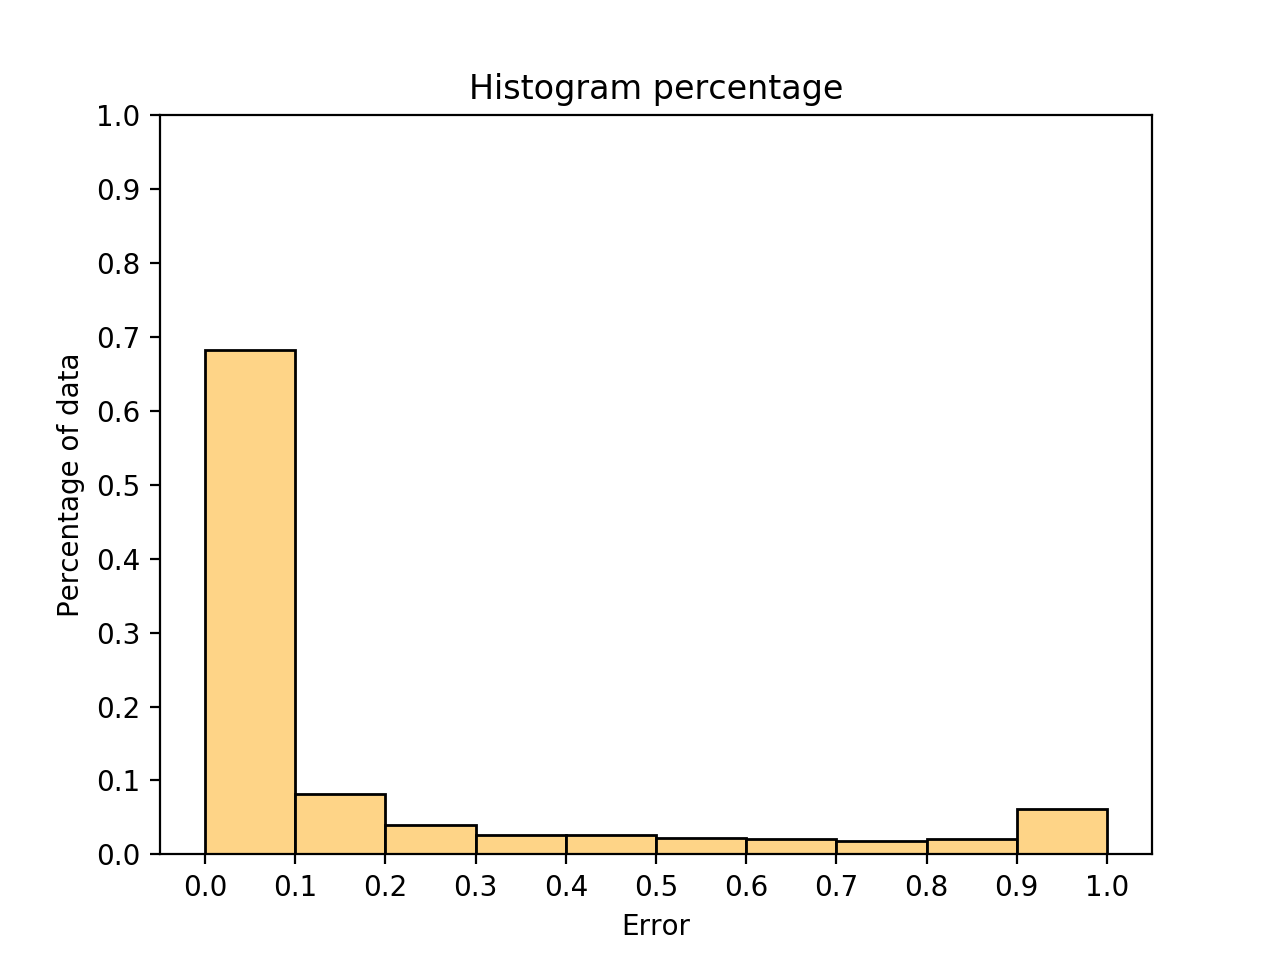

In [9]:
# Histogram percentage

perc_counts, bins = histogram_percentage(err, 10, (0.0, 1.0))

width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
fig = plt.figure()
plt.bar(center, perc_counts, align='center', width=width, color=color, edgecolor=edge_color, alpha=opacity)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title('Histogram percentage')
plt.xlabel('Error')
plt.ylabel('Percentage of data')
plt.show()
if save_fig:
    plt.savefig(('histogram_percentage.' + fig_format), format=fig_format, dpi=fig_dpi)

<IPython.core.display.Javascript object>


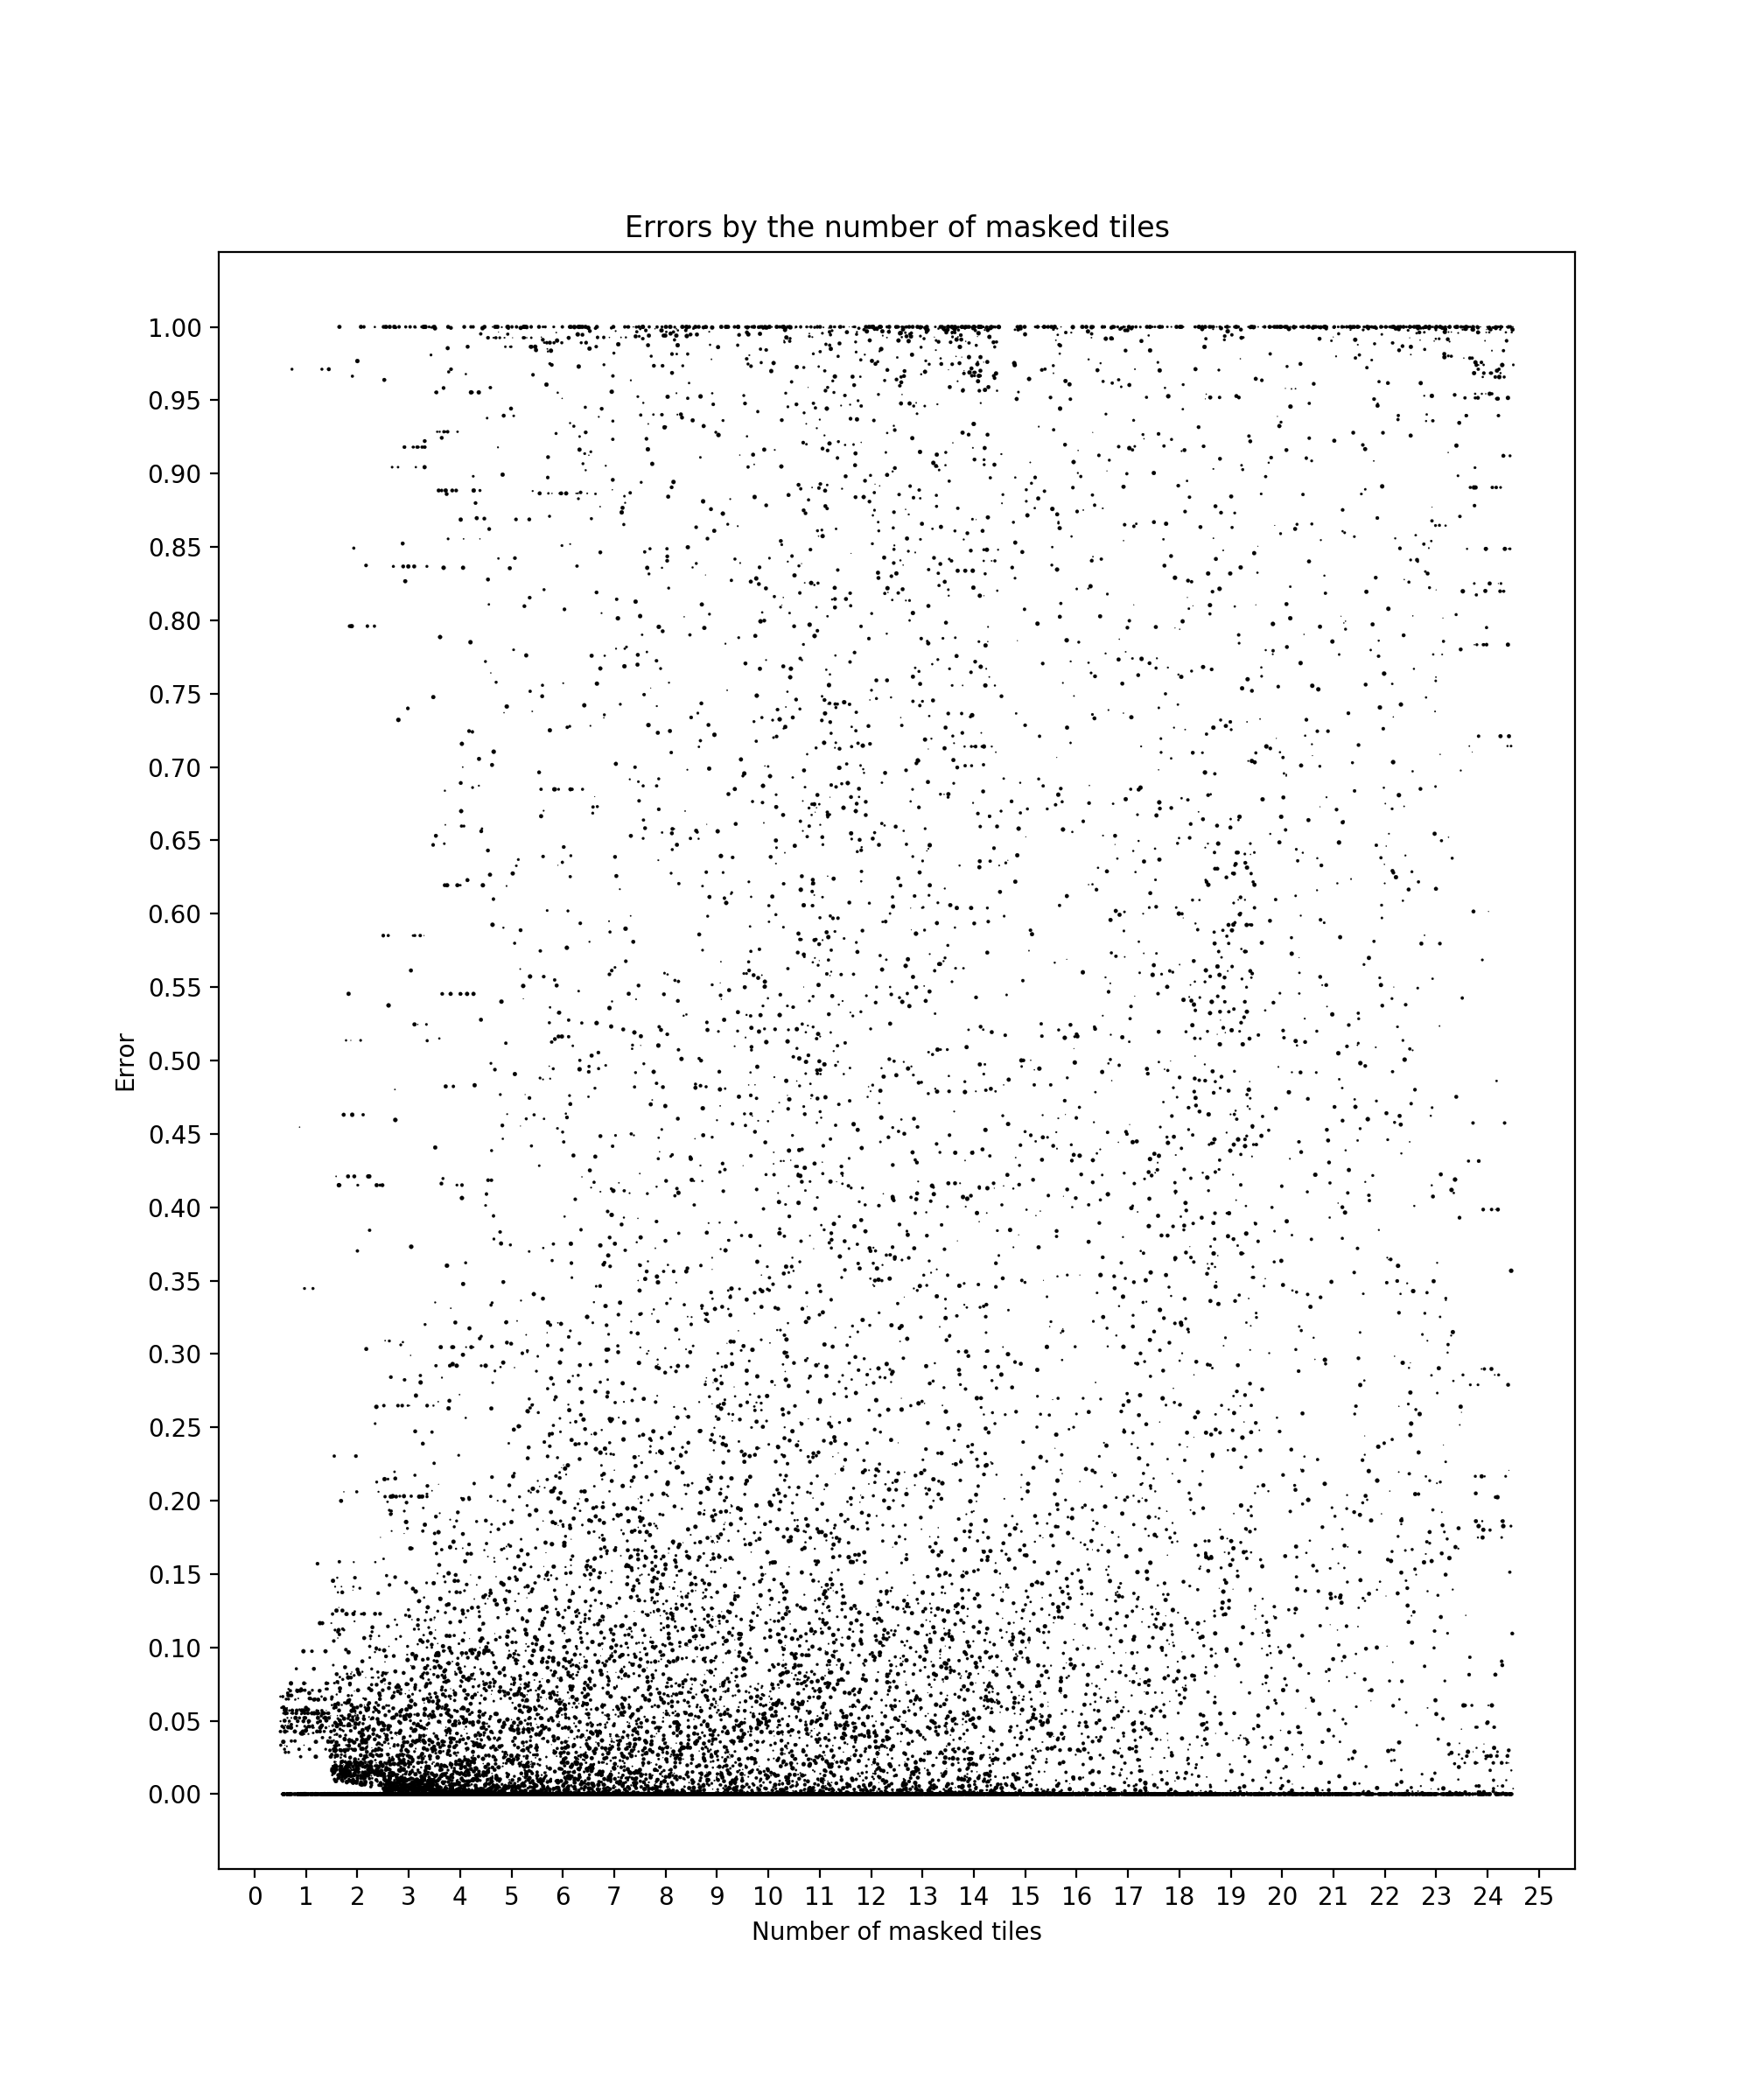

In [10]:
# Scatter plot of errors by the number of masked tiles

#random.seed(42)
#print(np.median(y_pred))

jitter = 0.5
num_masked_tiles = []
for x_t, e_t in zip(x, err):
    masked_tiles = count_num_masked_tiles(x_t)
    masked_tiles += random.uniform(-jitter, jitter) # Add a jitter between -0.5 and 0.5.
    num_masked_tiles.append(masked_tiles)

fig = plt.figure(figsize=(10, 12))
plt.scatter(num_masked_tiles, err, s=np.arange(0.1, 3.1, 0.1), linewidths=0.1, c=dot_color, alpha=opacity)

plt.xticks(range(num_tiles_subgrids + 1))
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.title('Errors by the number of masked tiles')
plt.xlabel('Number of masked tiles')
plt.ylabel('Error')
plt.show()
if save_fig:
    plt.savefig(('errors_by_num_masked_tiles.' + fig_format), format=fig_format, dpi=fig_dpi)

<IPython.core.display.Javascript object>


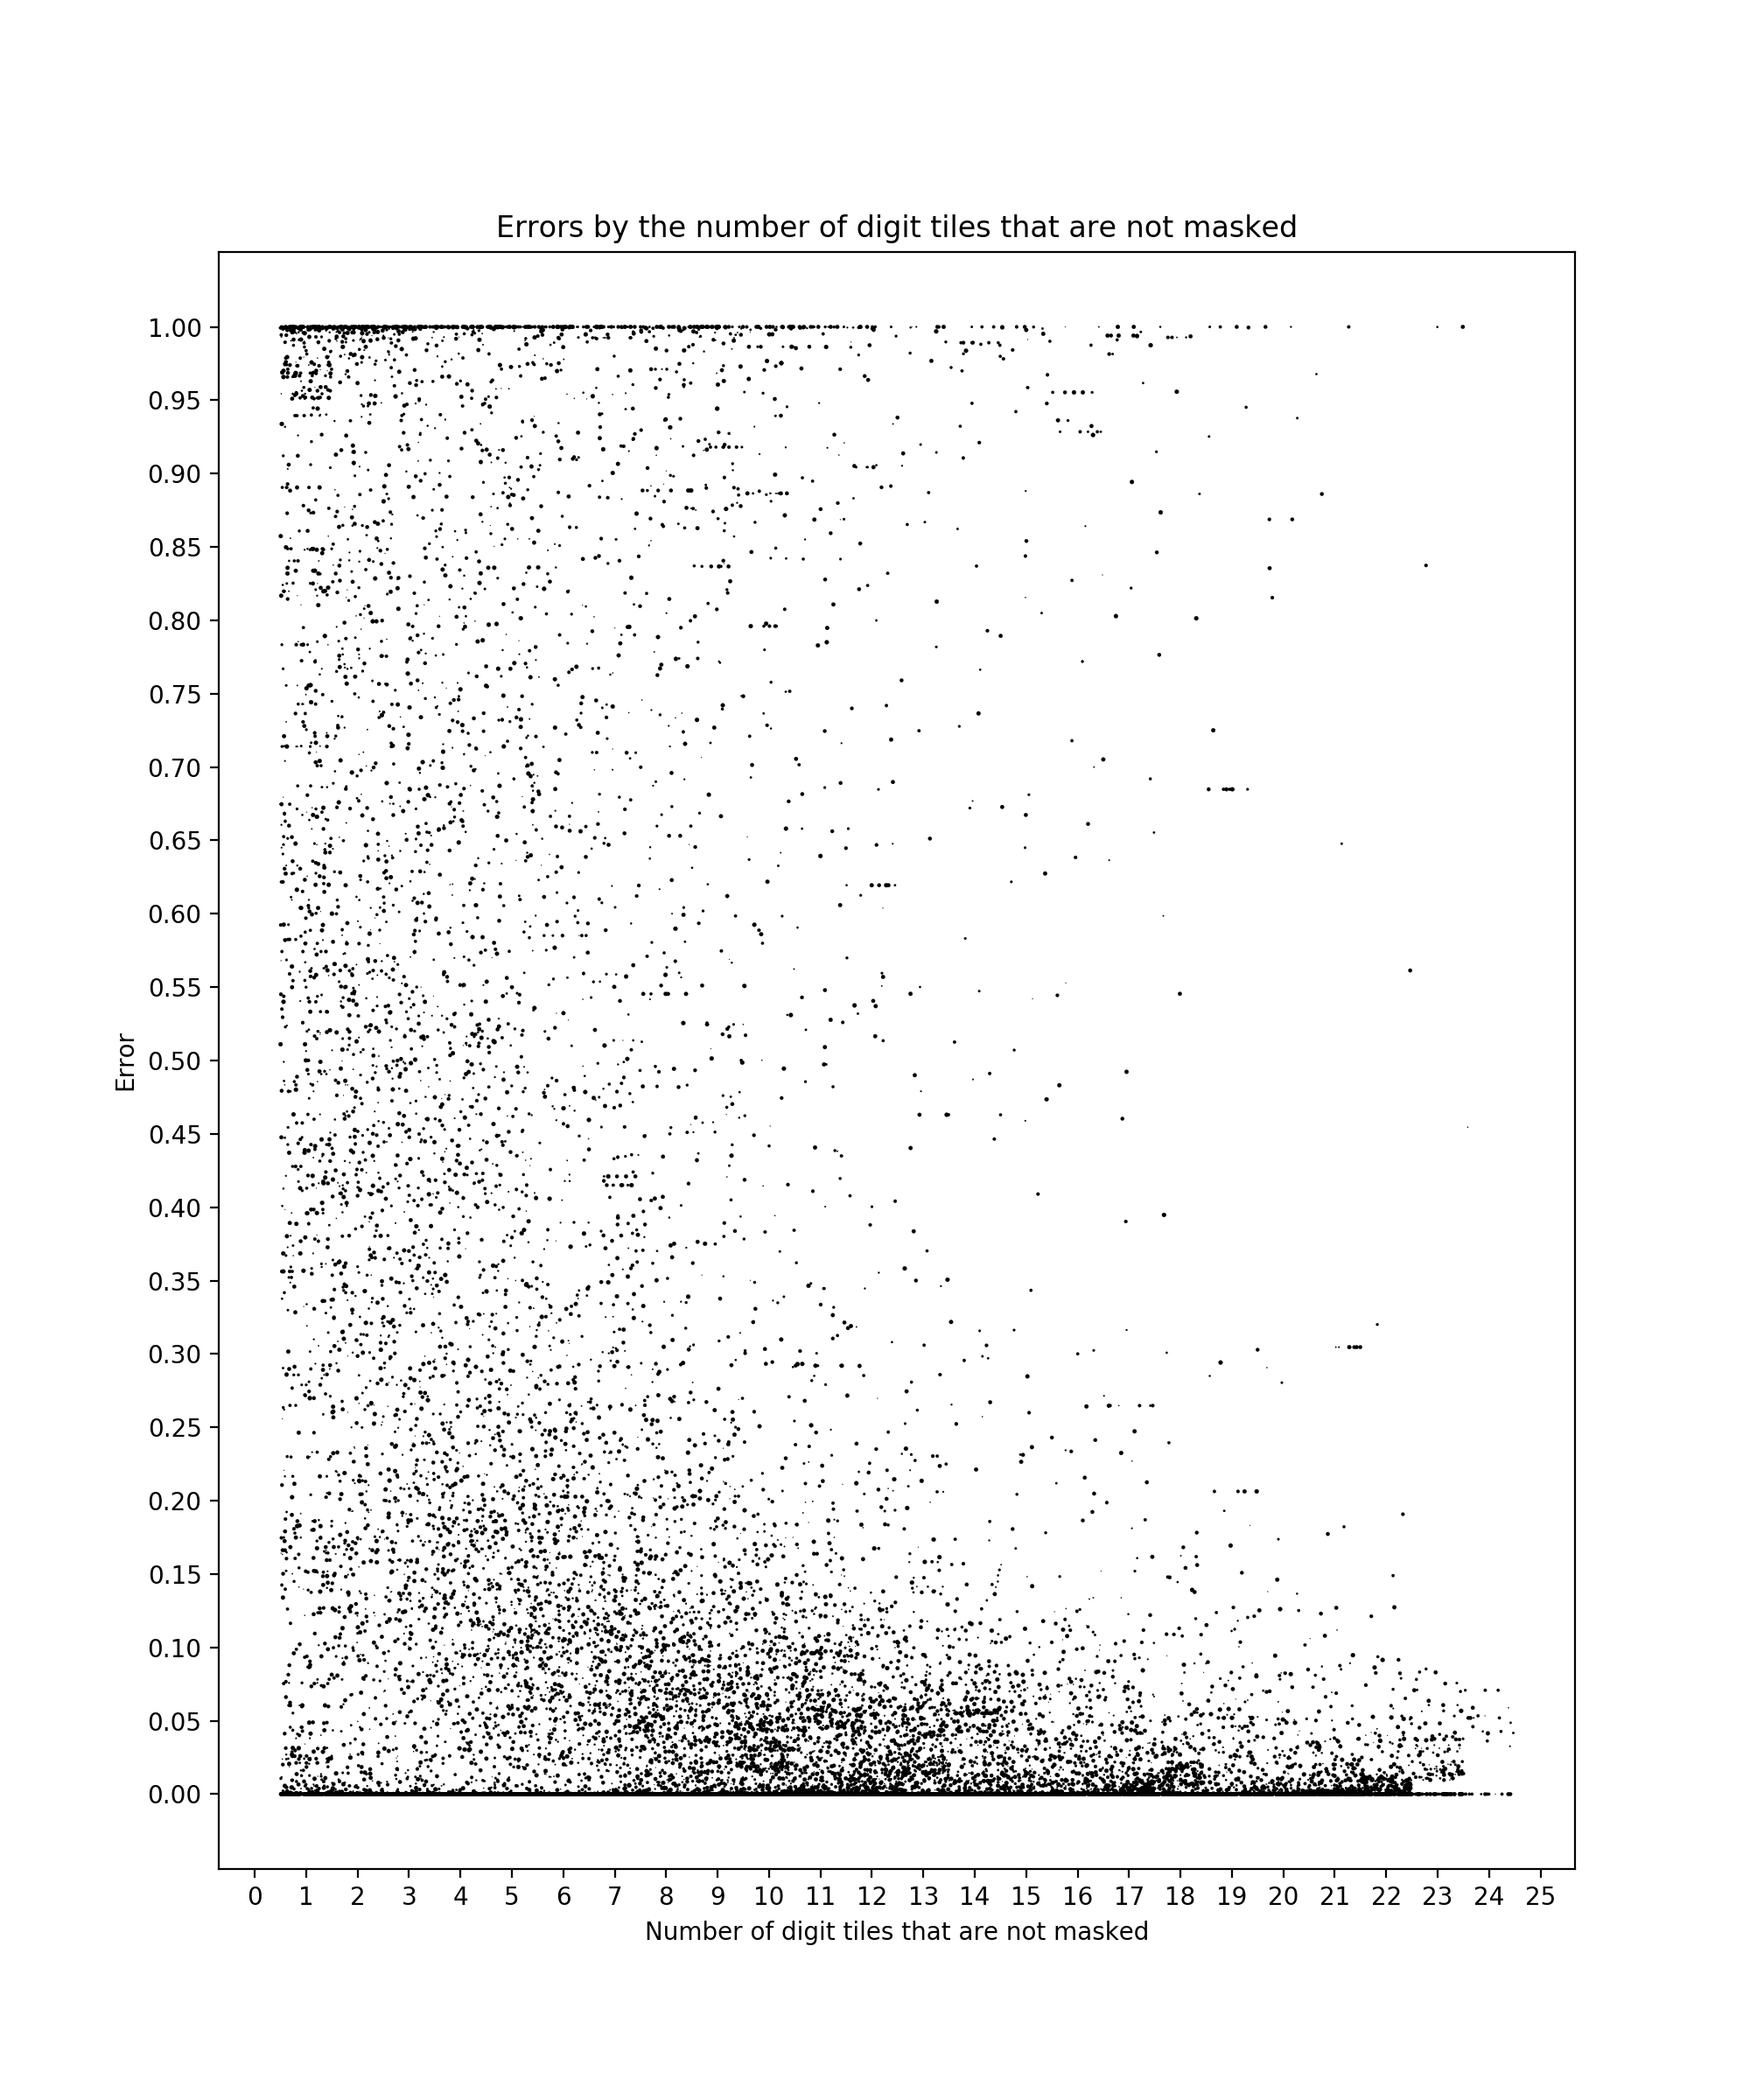

In [11]:
# Scatter plot of errors by the number of empty (digit) tiles that are not masked.

#random.seed(42)
#print(np.median(y_pred))

jitter = 0.5
num_masked_tiles = []
for x_t, e_t in zip(x, err):
    empty_tiles_not_masked = count_num_empty_tiles_not_masked(x_t)
    empty_tiles_not_masked += random.uniform(-jitter, jitter) # Add a jitter between -0.5 and 0.5.
    num_masked_tiles.append(empty_tiles_not_masked)

fig = plt.figure(figsize=(10, 12))
plt.scatter(num_masked_tiles, err, s=np.arange(0.1, 3.1, 0.1), linewidths=0.1, c=dot_color, alpha=opacity)

plt.xticks(range(num_tiles_subgrids + 1))
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.title('Errors by the number of digit tiles that are not masked')
plt.xlabel('Number of digit tiles that are not masked')
plt.ylabel('Error')
plt.show()
if save_fig:
    plt.savefig(('errors_by_num_empty_tiles_not_masked.' + fig_format), format=fig_format, dpi=fig_dpi)